In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

endangered_languages = pd.read_csv(
    './data_sets/endangered_languages_final.csv', index_col=0)

In [71]:
endangered_languages.head()

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11


In [72]:
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2697 entries, South Italian to Scanian
Data columns (total 12 columns):
Countries Where Spoken        2697 non-null object
Country Code                  2697 non-null object
Degree of Endangerment        2697 non-null object
Speakers                      2514 non-null float64
Latitude                      2694 non-null float64
Longitude                     2694 non-null float64
Fertility Rate Avg            2697 non-null float64
2018 Rank                     2097 non-null float64
2018 Score                    2097 non-null float64
2018 Band                     2097 non-null object
Number of Countries Spoken    2697 non-null int64
GDP Average (Current US $)    2697 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 273.9+ KB


# Exploring the Data
First let's get a description of each of the columns of my data set and then, we'll explore the data set by using a manual decision tree to drill down into the data. 
<ul>
<li>Index - Name of the language</li>
<li>Countries where spoken - Comma separated string of all the countries that language is known to be spoken in</li>
<li>Country Code - Alpha 3 country code (used this column to merge many of the disparate datasets)</li>
<li>Degree of Endangerment - Describes the level of danger the langauage is in</li>
<li>Speakers - Number of speakers for each langagues</li>
<li>Latitude - Latitudinal coordinate</li>
<li>Longitude - Longitudinal coordinate</li>
<li>Fertility Rate Avg. - Mean fertility rate for the country in the country code (1960 -2013)</li>
<li>2018 Rank - The rank 1 - 89 of countries that took the EF English Proficiency Exam in 2017</li>
<li>2018 Score - The score 100 - 0 of countries that took the EF English Proficiency Exam in 2017</li>
<li>2018 Band - Level of English proficiency for each country</li>
<li>Number of Countries Spoken - How many countries are/were speaking this language (It's the length of the Countries where Spoken column</li>
<li>GDP Avgerage (Current US $) - Mean GDP data from the world bank (1960 - 2017)</li>
</ul>

### First things first
Even in my cleaned data set there are still some missing values, so I've decided to drop the langauges with no known EF score (since being a country with high access to English is central to my hypothesis, I'm leaving those columns out for EDA purposes. I will be bringing them back for the ML model later on)

In [73]:
endangered_languages = endangered_languages.dropna()
# Now you can see all the missing values are gone
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, South Italian to Island Carib
Data columns (total 12 columns):
Countries Where Spoken        1931 non-null object
Country Code                  1931 non-null object
Degree of Endangerment        1931 non-null object
Speakers                      1931 non-null float64
Latitude                      1931 non-null float64
Longitude                     1931 non-null float64
Fertility Rate Avg            1931 non-null float64
2018 Rank                     1931 non-null float64
2018 Score                    1931 non-null float64
2018 Band                     1931 non-null object
Number of Countries Spoken    1931 non-null int64
GDP Average (Current US $)    1931 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 196.1+ KB


### 1. First split in the decision tree
I want to split the set into countries whose first langauage is English, that list includes the United States, Great Britan, Australia, Canada, New Zealand and Ireland) and coutnries whose native lanagues is something other than English

In [74]:
eng_speakers = endangered_languages[endangered_languages['Country Code'].isin(
    ['GBR', 'USA', 'CAN', 'AUS', 'NZL', 'IRL'])]
non_eng_speakers = endangered_languages[~endangered_languages['Country Code'].isin(
    ['GBR', 'USA', 'CAN', 'AUS', 'NZL', 'IRL'])]

### 2. Next fork in the road
Now let's separate the extinct languages (those with no speakers) from the still living langauges. In my ML model I will be using the extinct languages to test my predictions, but for now I'll separate them to perform different but still pertinent EDA on that set of the data

In [89]:
living_lang_eng = eng_speakers[eng_speakers['Degree of Endangerment'] != 'Extinct']
extinct_eng = eng_speakers[eng_speakers['Degree of Endangerment'] == 'Extinct']
living_lang_non_eng = non_eng_speakers[non_eng_speakers['Degree of Endangerment'] != 'Extinct']
extinct_non_eng = non_eng_speakers[non_eng_speakers['Degree of Endangerment'] == 'Extinct']

### 3. Let's drill down even more!
Now that the dataset is esentially split into 4 groups, I'll leave the extinct languages to the side for now. (We'll come back to them later) I want to look deeper into the living langagues. The level of endangerment for each langague can be one of the following
<ul>
<li>Vulnerable</li>
<li>Defintely Endangered</li>
<li>Severly Endangered</li>
<li>Critically Endangered</li>
</ul>

I'd like to group them by their category and run some analysis on each of those mini data sets to see what information we might gather

In [123]:
# valueList = living_lang_eng['Degree of Endangerment'].unique()

# def lower_first(str):
#     str = str[0].lower() + str[1:]
#     return str

# for category in valueList:
# lower_first(category.split(' ')[0]) + '_eng' = living_lang_eng.groupby(['Degree of Endangerment']).get_group(category)

SyntaxError: can't assign to operator (<ipython-input-123-c2aef702e083>, line 8)

In [135]:
level = living_lang_eng.groupby(['Degree of Endangerment'])

vulnerable_eng = level.get_group('Vulnerable')
definitely_eng = level.get_group('Definitely endangered')
severly_eng = level.get_group('Severely endangered')
critically_eng = level.get_group('Critically endangered')

And let's do the same for non_eng langagues

In [138]:
level2 = living_lang_non_eng.groupby(['Degree of Endangerment'])

vulnerable_non = level2.get_group('Vulnerable')
definitely_non = level2.get_group('Definitely endangered')
severly_non = level2.get_group('Severely endangered')
critically_non = level2.get_group('Critically endangered')

## Now for some EDA
Let's take a look at the distribution of a couple of factors. 
<ol>
<li>The number of speakers for each of these categories</li>
<li>Their EF English score (for non-english countries)</li>
<li>The average GDP for the countries</li>
<li>The average fertility rate of the countries</li>
</ol>

### Vulnerable languages from English Speaking Countries

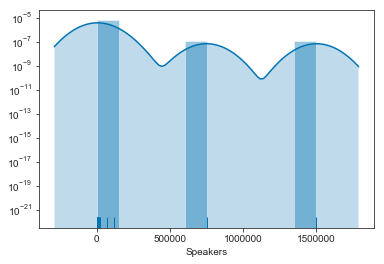

In [178]:
v_eng = sns.distplot(vulnerable_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})
# plt.xlim(-5000, 5000)
v_eng.set_yscale('log')

# vulnerable_eng[['Speakers']].plot(kind='bar')

In [187]:
vulnerable_eng_no_outliers = vulnerable_eng[vulnerable_eng['Speakers'] < 2500]

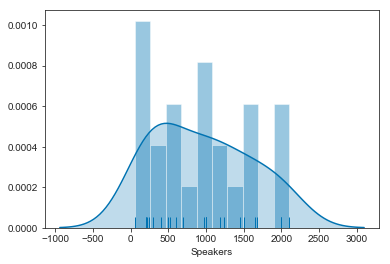

In [188]:
v_eng2 = sns.distplot(vulnerable_eng_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

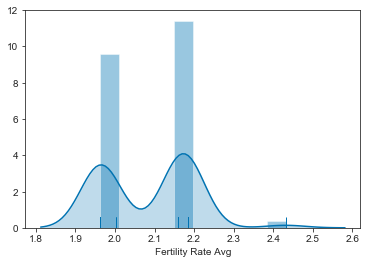

In [189]:
v_eng3 = sns.distplot(vulnerable_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

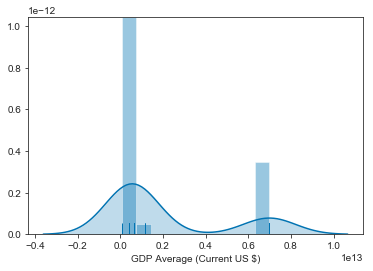

In [195]:
int_gdp = vulnerable_eng['GDP Average (Current US $)'].astype(int)
v_eng4 = sns.distplot(int_gdp, bins=10, kde=True, rug=True, kde_kws={'shade': True})

### Vulnerable languages from Non English Speaking Countries

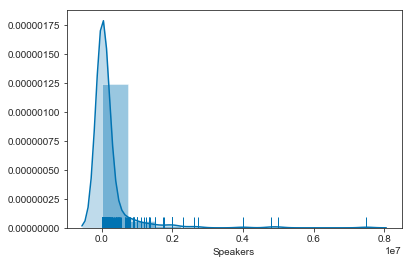

In [196]:
v_non = sns.distplot(vulnerable_non['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

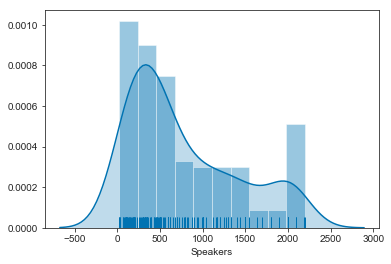

In [199]:
vulnerable_non_no_outliers = vulnerable_non[vulnerable_non['Speakers'] < 2500]
v_non2 = sns.distplot(vulnerable_non_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

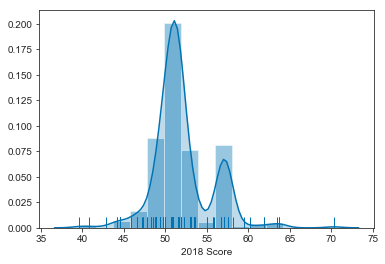

In [207]:
v_non3 = sns.distplot(vulnerable_non['2018 Score'], bins=15, kde=True, rug=True, kde_kws={'shade': True})

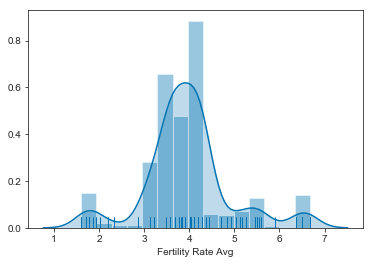

In [210]:
v_non4 = sns.distplot(vulnerable_non['Fertility Rate Avg'], bins=15, kde=True, rug=True, kde_kws={'shade': True})

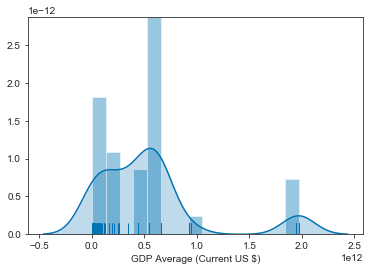

In [211]:
int_gdp2 = vulnerable_non['GDP Average (Current US $)'].astype(int)
v_non5 = sns.distplot(int_gdp2, bins=15, kde=True, rug=True, kde_kws={'shade': True})

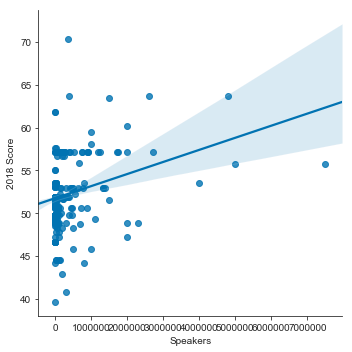

In [214]:
v_non6 = sns.lmplot(x='Speakers', y='2018 Score', data=vulnerable_non)

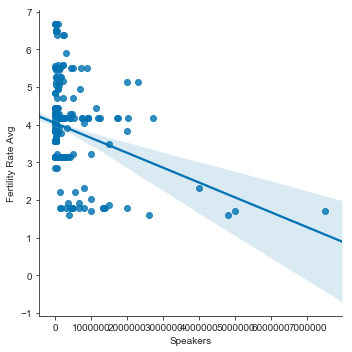

In [218]:
v_non7 = sns.lmplot(x='Speakers', y='Fertility Rate Avg', data=vulnerable_non)